In [40]:
import matplotlib.pyplot as plt
import numpy as np

In [41]:
from PIL import Image

In [42]:
img_path = "/content/koala-bear-australia-1-1024x768.jpg"

In [43]:
img = plt.imread(img_path)
print(img.shape)

(750, 1000, 3)


In [44]:
import os
round(os.path.getsize(img_path)/1024)

341

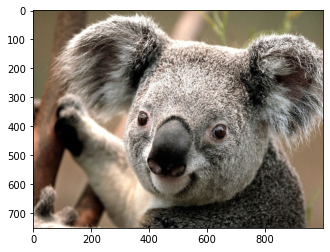

In [45]:
plt.imshow(img)

In [46]:
X = (img/255).reshape(img.shape[0]*img.shape[1],3)
X

array([[0.39607843, 0.34117647, 0.23529412],
       [0.42745098, 0.37254902, 0.26666667],
       [0.43529412, 0.38039216, 0.2745098 ],
       ...,
       [0.5372549 , 0.45490196, 0.34901961],
       [0.54117647, 0.45882353, 0.35294118],
       [0.54901961, 0.46666667, 0.36078431]])

In [47]:
X.shape

(750000, 3)

In [48]:
def euclid_dist(x,y):
  return np.sqrt(np.sum((x-y)**2))

In [49]:
def initial_centroids(X,k):
  return X[np.random.choice(len(X), k, replace=False), :]

In [50]:
def close_centroid(X,centroids,k):

    c = np.zeros(len(X))
    
    for i in range(len(X)):
        distances = np.array([])
        for j in range(k):
          distances = np.append(distances,euclid_dist(X[i],centroids[j]))
          c[i] = np.argmin(distances)

    return c

In [51]:
def find_means(X,indexes,k):
  
  centroids = np.zeros((k,X.shape[1]))
  
  for i in range(k):
    data = X[np.where(indexes == i)]
    avg  = [np.mean(col) for col in data.T]
    centroids[i] = avg

  return centroids 

In [52]:
def kmeans(X,k):
  
  centroids = initial_centroids(X,k)
  prev_centroids = centroids
  
  for i in range(10):
    
    indexes = close_centroid(X,centroids,k)
    cent_new = find_means(X,indexes,k)
    
    if (cent_new == prev_centroids).all():
      return cent_new
    else:
      prev_centroids = cent_new

  return centroids, indexes

In [53]:
sample = np.array([
                   [1,2],[1,4],[1,0],
                   [10,2],[10,4],[10,2]
])
sample.shape

(6, 2)

In [54]:
close_centroid(sample,initial_centroids(sample,2),2)

array([1., 1., 1., 0., 0., 0.])

In [55]:
k_range = [2,5,10,15,20]

In [56]:
def plot_images(img,comp_img):
  fig,ax = plt.subplots(1,2)
  img = ax[0].imshow(img)
  comp_img = ax[1] .imshow(comp_img)
  for i in range(2):
      title = ["Orginal","Compressed"]
      ax[i].set_title(title[i])
  plt.show()

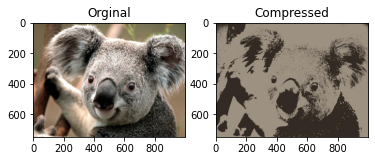

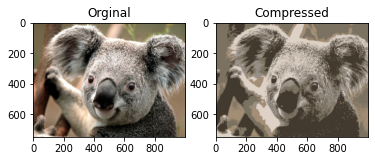

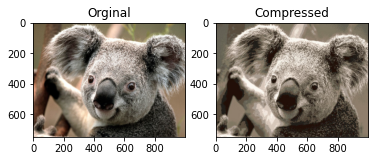

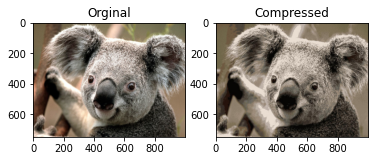

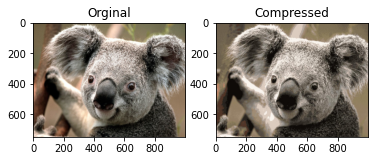

In [57]:
for k in k_range:
  colors = kmeans(X,k)
  idx = close_centroid(X,colors,k)
  idx = np.array(idx, dtype=np.uint8)
  X_recover = np.array(colors[idx, :] * 255, dtype=np.uint8)
  X_recover = np.reshape(X_recover,img.shape)
  compressed_image = Image.fromarray(X_recover)
  name = '/content/comp_img_' + str(k) + '.jpg'
  compressed_image.save(name)
  comp_img = plt.imread(name)
  plot_images(img,comp_img)

In [58]:
round(os.path.getsize(img_path)/1024)

341

In [60]:
for k in k_range:
  f_path = "/content/comp_img_"+str(k)+".jpg"
  print(round(os.path.getsize(f_path)/1024))

123
150
166
159
158
